In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset (simplified Titanic)
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Feature engineering (minimal for demo)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
df = df.dropna(subset=['Age', 'Embarked'])
df['Embarked'] = df['Embarked'].astype('category').cat.codes

# Define features and target
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0]
Logistic Regression Accuracy: 0.7902097902097902
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143



In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

[1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0
 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0
 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1]
KNN Accuracy: 0.6923076923076923


In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

[1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0]
Decision Tree Accuracy: 0.7412587412587412


In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

[1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1]
Random Forest Accuracy: 0.7692307692307693


In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC(kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(y_pred)
print("SVM Accuracy:", accuracy_score(y_test, y_pred))

[1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0]
SVM Accuracy: 0.8041958041958042


In [14]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

[1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0]
Naive Bayes Accuracy: 0.7692307692307693


In [15]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

[1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1]
XGBoost Accuracy: 0.7832167832167832


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:27:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [20]:
import matplotlib.pyplot as plt

# Store all model names and their accuracy scores
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'XGBoost']
accuracies = []

In [24]:
# Re-calculate and store model accuracies (example: Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
accuracies.append(accuracy_score(y_test, log_pred))
print(accuracies)

[0.78, 0.75, 0.7902097902097902]


In [25]:
# Repeat for each model (KNN, DT, etc.) or store scores from before if already available
# Example for KNN:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
accuracies.append(accuracy_score(y_test, knn_pred))
print(accuracies)

[0.78, 0.75, 0.7902097902097902, 0.6923076923076923]


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Preprocess (again, if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'XGBoost']
accuracies = []

# 1. Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# 2. KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# 3. Decision Tree
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)
accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# 4. Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# 5. SVM
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train)
accuracies.append(accuracy_score(y_test, model.predict(X_test_scaled)))

# 6. Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# 7. XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
accuracies.append(accuracy_score(y_test, model.predict(X_test)))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:09:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


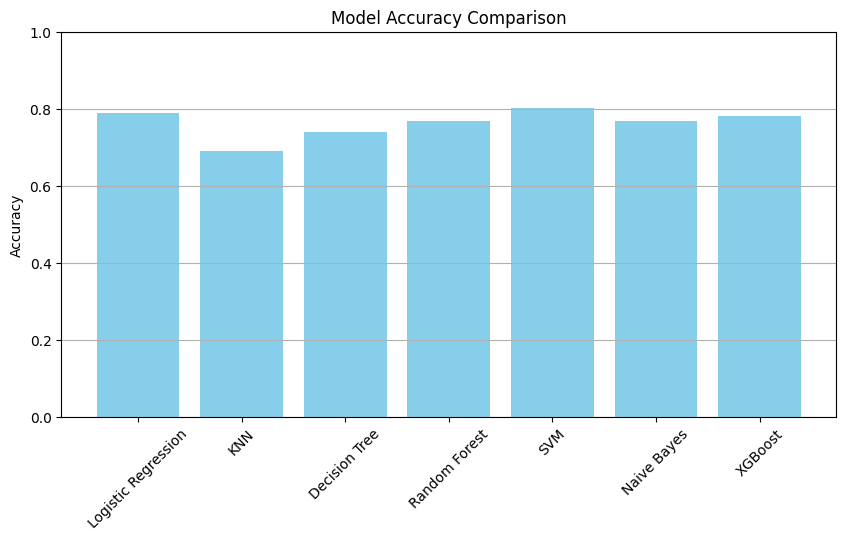

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()